In [39]:
import torch

## 5.3.1 텐서 초기화

### 텐서
- pythorch가 수치 정보를 저장하고 조작하는 기본 데이터 구조
- 배열과 행렬의 일반화된 형태

In [40]:
#list 및 기본 숫자로 텐서 초기화화

arr = [1,2]
tensor = torch.tensor(arr)
val = 2.0
tensor = torch.tensor(val)

In [41]:
# 넘파이로 텐서 초기화
import numpy as np
np_arr = np.array([1,2])
x_t = torch.from_numpy(np_arr)

In [42]:
#0,1 또는 랜덤 숫자로 텐서 초기화
zeros_t = torch.zeros((2,3)) # Returns 2x3 tensor of zeros
ones_t = torch.ones((2,3)) # Returns 2x3 tensor of ones
rand_t = torch.randn((2,3)) # Returns 2x3 tensor of random numbers

## 5.3.2 텐서 속성
- 튜플의 색인 개수: 생성될 텐서의 차원
- 색인의 숫자: 해당 특정 차원의 크기

In [43]:
zeros_t.shape # Returns torch.Size([2, 3])

torch.Size([2, 3])

텐서에는 데이터 타입에 대한 정보도 저장 됨   
  
텐서는 여러 데이터 타입을 조합하거나 매치하는 것이 불가능

In [44]:
x_t = torch.tensor(2.0)
x_t.dtype # Returns torch.float32

torch.float32

텐서 초기화 진행 시 사전적으로 텐서의 데이터 타입 설정이 가능

In [45]:
arr = [1,2]
x_t = torch.tensor(arr, dtype=torch.float32)
     

해당 텐서가 할당된 장치를 불러 올 수 있음
   
CPU: 텐서의 기본 저장소   
GPU: 이미지 공간에서 자주 사용(병렬처리)

In [46]:
x_t.device # Returns device(type='cpu') by default
     

device(type='cpu')

In [47]:
#텐서의 장치 사전 설정
#GPU 우선 사용용
device = 'cuda' if torch.cuda.is_available() else 'cpu'
arr = [1,2]
x_t = torch.tensor(arr, dtype=torch.float32, device=device)

텐서의 속성들을 수정학자 할 때 to 함수 사용

In [48]:
x_t = x_t.to(device, dtype=torch.int)

## 5.3.3 텐서연산

1. 텐서의 기본연산
- 스칼라 곱 : 각 요소의 위치에 맞추어 곱셈 진행
- 덧셈/뺄셈: + 기호, 스칼라 -1을 곱하고 덧셈하는 방식 

In [49]:
c = 10
x_t = x_t*c

x1_t = torch.zeros((1,2))
x2_t = torch.ones((1,2))
x1_t + x2_t
# returns tensor([[1., 1.]])
     

tensor([[1., 1.]])

2. 텐서의 곱셈

case1. 3차원 텐서   
첫번째 텐서: (2,1,2) : 1 x 2 행렬이 2개   
두번째 텐서: (2,2,2) : 2 x 2 행렬이 2개

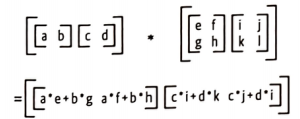

계산 결과: 1 x 2 행렬이 2개 

case2. 4차원 텐서

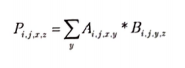

PYTORCH에서 두개의 텐서를 곱할 때는 torch.matmul 함수를 사용

In [50]:
x1_t = torch.tensor([[1,2],[3,4]])
x2_t = torch.tensor([[1,2,3],[4,5,6]])
torch.matmul(x1_t, x2_t)

tensor([[ 9, 12, 15],
        [19, 26, 33]])

In [51]:
#i,j,k를 각각 할당함으로써 접근도 가능

i,j,k = 0,1,1
x3_t = torch.tensor([[[3,7,9],[2,4,5]],[[8,6,2],[3,9,1]]])
print(x3_t)
# out:
# tensor([[[3, 7, 9],
#          [2, 4, 5]],
#         [[8, 6, 2],
#          [3, 9, 1]]])

x3_t[i,j,k]
# out:
# tensor(4)

tensor([[[3, 7, 9],
         [2, 4, 5]],

        [[8, 6, 2],
         [3, 9, 1]]])


tensor(4)

In [52]:
#슬라이싱도 numpy와 유사하게 가능
x3_t[0] # Returns the matrix at position 0 in tensor
x3_t[0,:,:] # Also returns the matrix at position 0 in tensor!

tensor([[3, 7, 9],
        [2, 4, 5]])

In [53]:
#직접적으로 텐서의 위치에 특정 값을 대입하는 것도 가능
x3_t[0,1,2] = 1
# out:
# tensor([[[3, 7, 9],
#          [2, 4, 1]],

#         [[8, 6, 2],
#          [3, 9, 1]]])

## 5.4 PyTorch에서의 경사

backward(): 각 입력 변수에 대한 출력 f의 편미분을 계산   

case: 신경망
$$f(x,\theta), x= 벡터, \theta = f의 파라미터$$

- θ에 대한 f의 출력갑 손실의 경사를 계산

In [54]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(1.5, requires_grad=True)
f = x**2+y**2+z**2
f.backward()
x.grad, y.grad, z.grad
# out:
# (tensor(4.), tensor(6.), tensor(3.))

(tensor(4.), tensor(6.), tensor(3.))

## 5.5 PyTorch nn 모듈

In [55]:
import torch.nn as nn

### 순방향 신경망 (FNN)
- 입력층 -> 은닉층 -> 출력층 순으로만 데이터가 이동
    - 입력층: 데이터를 입력 받음
    - 은닉층: 입력츠의 데이터를 변환하고 학습
    - 출력층: 최종 결과 출력

In [56]:
#순방향 신경망에 필요한 가중치 행렬 초기화

#입력벡터 차원: 256, 출력벡터의 차원: 10
in_dim, out_dim = 256, 10

#크기가 (256,)인 1차원 텐서 생성
vec = torch.randn(256)

#선형 변환을 정의
#bias= true: 편향도 학습
#y=Wx+b (W)
layer = nn.Linear(in_dim, out_dim, bias=True)
out = layer(vec)

In [57]:
W = torch.rand(10,256)
b = torch.zeros(10,1)
out = torch.matmul(W, vec) + b

In [58]:
in_dim, feature_dim, out_dim = 784, 256, 10
vec = torch.randn(784)
layer1 = nn.Linear(in_dim, feature_dim, bias=True)
layer2 = nn.Linear(feature_dim, out_dim, bias=True)
out = layer2(layer1(vec))
     

In [59]:
relu = nn.ReLU()
out = layer2(relu(layer1(vec)))

In [60]:
class BaseClassifier(nn.Module):
  def __init__(self, in_dim, feature_dim, out_dim):
    super(BaseClassifier, self).__init__()
    self.layer1 = nn.Linear(in_dim, feature_dim, bias=True)
    self.layer2 = nn.Linear(feature_dim, out_dim, bias=True)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    out = self.layer2(x)
    return out
     

In [61]:
no_examples = 10
in_dim, feature_dim, out_dim = 784, 256, 10
x = torch.randn((no_examples, in_dim))
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
out = classifier(x)

In [62]:

loss = nn.CrossEntropyLoss()
target = torch.tensor([0,3,2,8,2,9,3,7,1,6])
computed_loss = loss(out, target)
computed_loss.backward()

In [63]:
for p in classifier.parameters():
  print(p.shape)

# out:
# torch.Size([256, 784])
# torch.Size([256])
# torch.Size([10, 256])
# torch.Size([10])
     

torch.Size([256, 784])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


In [64]:
from torch import optim

lr = 1e-3
optimizer = optim.SGD(classifier.parameters(), lr=lr)
     

In [65]:
optimizer.step() # Updates parameters via SGD
optimizer.zero_grad() # Zeroes out gradients between minibatches

In [66]:
from torch.utils.data import Dataset, DataLoader

In [67]:
import numpy as np
labels = np.array([2, 0, 4, 1])
np.save('labels',labels)

In [68]:
labels_1 = np.load('labels.npy')
labels_1

array([2, 0, 4, 1])

In [69]:
!mkdir -p data
!mkdir -p data/train

!wget -O data/train/img_0.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_0.jpg
!wget -O data/train/img_1.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_1.jpg
!wget -O data/train/img_2.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_2.jpg
!wget -O data/train/img_3.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_3.jpg
!wget -O data/train/labels.npy -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/labels.npy
     

���� ���͸� �Ǵ� ���� -p��(��) �̹� �ֽ��ϴ�.
���� ���� ���� �� ���� �߻�: -p.
���� ���͸� �Ǵ� ���� data��(��) �̹� �ֽ��ϴ�.
���� ���� ���� �� ���� �߻�: data.
���� ������ �ùٸ��� �ʽ��ϴ�.
'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [70]:
import os
from PIL import Image
from torchvision import transforms

class ImageDataset(Dataset):
  def __init__(self, img_dir, label_file):
    super(ImageDataset, self).__init__()
    self.img_dir = img_dir
    self.labels = torch.tensor(np.load(label_file, allow_pickle=True))
    self.transforms = transforms.ToTensor()
  
  def __getitem__(self, idx):
    img_pth = os.path.join(self.img_dir, "img_{}.jpg".format(idx))
    img = Image.open(img_pth)
    img = self.transforms(img).flatten()
    label = self.labels[idx]
    return {"data":img, "label":label}
  
  def __len__(self):
    return len(self.labels)

In [71]:

train_dataset = ImageDataset(img_dir='./data/train/',
                             label_file='labels.npy')

train_loader = DataLoader(train_dataset, 
                          batch_size=4, 
                          shuffle=True)

In [72]:
for minibatch in train_loader:
  data, labels = minibatch['data'], minibatch['label']
  print(data)
  print(labels)
     

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pjung\\OneDrive\\문서\\정현\\동아리\\쿠다\\CV\\data\\train\\img_2.jpg'

In [73]:

import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# For reproducability
torch.manual_seed(0)

In [74]:

class BaseClassifier(nn.Module):
  def __init__(self, in_dim, feature_dim, out_dim):
    super(BaseClassifier, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(in_dim, feature_dim, bias=True),
        nn.ReLU(),
        nn.Linear(feature_dim, out_dim, bias=True)
    )
    
  def forward(self, x):
    return self.classifier(x)
    

# Load in MNIST dataset from PyTorch
train_dataset = MNIST(".", train=True, 
                      download=True, transform=ToTensor())
test_dataset = MNIST(".", train=False, 
                     download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, 
                          batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, 
                         batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.84MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 107kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 871kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.46MB/s]


In [75]:


# Instantiate model, optimizer, and hyperparameter(s)
in_dim, feature_dim, out_dim = 784, 256, 10
lr=1e-3
loss_fn = nn.CrossEntropyLoss()
epochs=40
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
optimizer = optim.SGD(classifier.parameters(), lr=lr)

def train(classifier=classifier,
          optimizer=optimizer,
          epochs=epochs,
          loss_fn=loss_fn):

  classifier.train()
  loss_lt = []
  for epoch in range(epochs):
    running_loss = 0.0
    for minibatch in train_loader:
      data, target = minibatch
      data = data.flatten(start_dim=1)
      out = classifier(data)
      computed_loss = loss_fn(out, target)
      computed_loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      # Keep track of sum of loss of each minibatch
      running_loss += computed_loss.item()
    loss_lt.append(running_loss/len(train_loader))
    print("Epoch: {} train loss: {}".format(epoch+1, running_loss/len(train_loader)))

  plt.plot([i for i in range(1,epochs+1)], loss_lt)
  plt.xlabel("Epoch")
  plt.ylabel("Training Loss")
  plt.title(
      "MNIST Training Loss: optimizer {}, lr {}".format("SGD", lr))
  plt.show()

  # Save state to file as checkpoint
  torch.save(classifier.state_dict(), 'mnist.pt')

In [76]:
def test(classifier=classifier, 
          loss_fn = loss_fn):
  classifier.eval()
  accuracy = 0.0
  computed_loss = 0.0

  with torch.no_grad():
      for data, target in test_loader:
          data = data.flatten(start_dim=1)
          out = classifier(data)
          _, preds = out.max(dim=1)

          # Get loss and accuracy
          computed_loss += loss_fn(out, target)
          accuracy += torch.sum(preds==target)
          
      print("Test loss: {}, test accuracy: {}".format(
          computed_loss.item()/(len(test_loader)*64), accuracy*100.0/(len(test_loader)*64)))

Epoch: 1 train loss: 2.215214545284507
Epoch: 2 train loss: 1.9865606162847995
Epoch: 3 train loss: 1.68397662990383
Epoch: 4 train loss: 1.3707987561917254
Epoch: 5 train loss: 1.1183070817481735
Epoch: 6 train loss: 0.9397796002278196
Epoch: 7 train loss: 0.8165212073432866
Epoch: 8 train loss: 0.7291736381013256
Epoch: 9 train loss: 0.6650731678901196
Epoch: 10 train loss: 0.6160336538418524
Epoch: 11 train loss: 0.577698049069976
Epoch: 12 train loss: 0.5468619964651461
Epoch: 13 train loss: 0.5215045560651751
Epoch: 14 train loss: 0.5004252969011315
Epoch: 15 train loss: 0.48268671330612606
Epoch: 16 train loss: 0.46720173189253694
Epoch: 17 train loss: 0.45397682136881834
Epoch: 18 train loss: 0.44245280757514655
Epoch: 19 train loss: 0.43208582756488817
Epoch: 20 train loss: 0.42304513908461977
Epoch: 21 train loss: 0.41484403834223493
Epoch: 22 train loss: 0.40739696453819907
Epoch: 23 train loss: 0.4006882559484256
Epoch: 24 train loss: 0.3944375685124255
Epoch: 25 train loss:

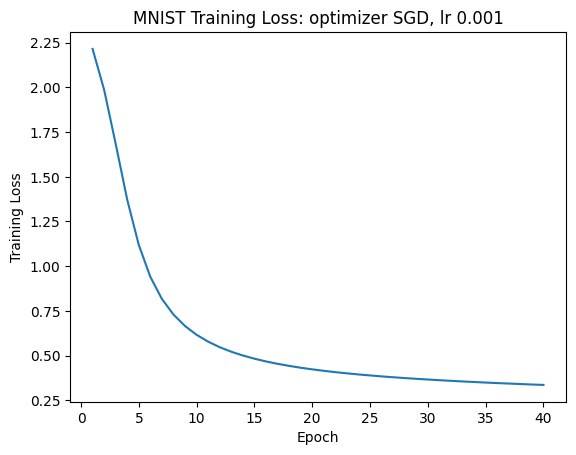

In [77]:

train()

In [78]:

test()

Test loss: 0.004984638113884409, test accuracy: 90.66481018066406
